In [ ]:
%%html
<script>
  ((window.gitter = {}).chat = {}).options = {
    room: 'MYWAS/Lobby'
  };
</script>
<script src="https://sidecar.gitter.im/dist/sidecar.v1.js" async defer></script>

In [ ]:
%%html
<script>
    // AUTORUN ALL CELLS ON NOTEBOOK-LOAD!
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            $(jupyter.events).on("kernel_ready.Kernel", function () {
                console.log("Auto-running all cells-below...");
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
            });
        }
    );
</script>

# Water Linkages

WAS can simulate the construction of new water linkages and the expansion of existing linkages.  This feature can be used to:
* Determine the best place for infrastructure development or improvement
* Discover the benefits of trade between areas that are not currently connected
* Determine if a proposed linkage or expansion is worth the cost

### Creating and Editing Linkages

Creating a linkages can lower the cost or providing water in a region.  When a new linkage is built to a region, the supply curve shifts to accomodate newly available water, as shown below.


Current LEvel
6
[(6, 7), (3, 4), (1, 2)]
[(6, 7), (3, 4), (1, 2), (2.99, 3.2)]
[(7.1, 7), (4.1, 4), (2.99, 3.2), (1, 2)]


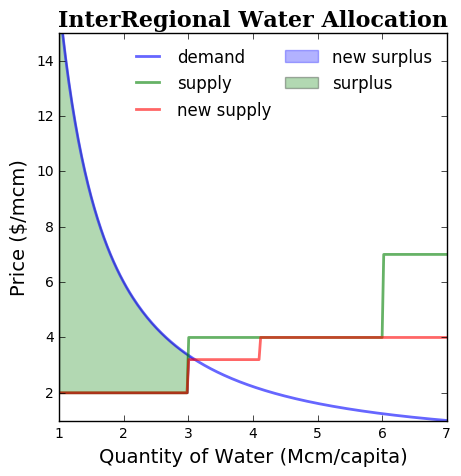

In [3]:
import econgraphs
from ipywidgets import interact
from econgraphs import graphMaker, highAltMarket

@interact(cost_mcm = (.5,6,.1),capacity = (.2,2,.1))
def drawNewLinkage(cost_mcm, capacity):
    graphMaker.drawSupplyShift(newPoint = (cost_mcm,capacity))

A linkage may cause water to be reallocated from one city to another, causing a decrease in welfare in the region of origin.  The amount of water allocated to the destination through the linkage at the optimal level such that the scarcity rent is the same in both markets.  

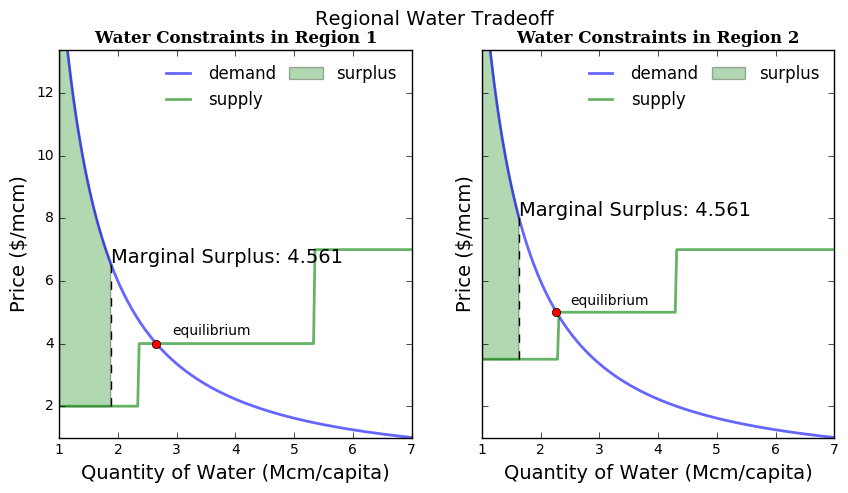

In [8]:

from econgraphs import highAltMarket, supplyLevels
from copy import deepcopy

@interact(cost_mcm = (1,4,.1),capacity=(.1,2,.05))
def drawLinkedMarkets(cost_mcm,capacity):
    newPoint = (cost_mcm+1,capacity)
    newMarket = deepcopy(highAltMarket)
    newPoints = copy(newMarket.supplyFunc.interval_points).tolist()
    currentLevel = newPoints[0][0]
    for points in newPoints:
        if newPoint[0] > points[1]:
              break
        currentLevel = points[0]-.01
    newPoints.append((currentLevel,newPoint[0]))            
    newPoints.sort(reverse=True)
    newPoints = [(i+newPoint[1],j) if i > currentLevel else (i,j) for i,j in newPoints]
    newMarket.supplyFunc.interval_points = newPoints
    newMarket.supplyFunc.interval_points.sort(reverse=True)
    originalPoints = copy(supplyLevels)
    originalPoints = [(i-capacity/2,j) for i,j in originalPoints]
    originalPoints.sort(reverse=True)
    graphMaker.market.supplyFunc.interval_points = originalPoints
    graphMaker.market.findEQ()
    graphMaker.drawOptimalTradeoff(3.5,otherMarket = newMarket, annotate = True)


Mathematically, when you change or add a linkage, you are changing the $$ Cost_{transport} $$ in following (unresrticted) optimalty condition: $$ ShadowPrice_{destination}\ =\ ShadowPrice_{origin}\ +\ Cost_{transport}$$.

# Changing Linkages in WAS

To add a new linkage, open the fresh water links window,

![link window][link-window]

select a country to change linkages in,

![link country][link-country]

and select a region on the left to view and adjust linkages in.  When you selet the region you will see all current linkages highlighted on the right.

![link region][link-region]

To toggle the flow direction of a linkage, click the colored linkage on the right that you wish to toggle.

![link toggle][link-toggle]

To add a new link, click the region to be connected on the right and it will become highlighted.  Click again to toggle the direction.

![link add][link-add]

Click finished.  If you have added new connections, a window will appear for each.  Enter the cost and capacity parameters.  999 can be used to represent unlimited capacity, and 0 can be enetered for the no leakage condition.

![link info][link-info]

Remember that the cost of the linkage **does not** include the construction cost.

### Editing Linkage Details

Sometimes you may need to adjust the cost, capacity, or leakgage of an existing linkage.  Click edit next to "transport costs/bounds" to open the adjustment window. 

![tport window][tport-window]

Then select the country

![tport country][tport-country]

and select the destination.  You can new edit the parameters for the linkage. 

![tport select][tport-select]

Remember to click Finished when done.




[link-window]: https://github.com/akaufman10/was/blob/master/static/screenshots/link-window.png?raw=true
[link-country]: https://github.com/akaufman10/was/blob/master/static/screenshots/link-country.png?raw=true
[link-region]: https://github.com/akaufman10/was/blob/master/static/screenshots/link-region.png?raw=true
[link-toggle]: https://github.com/akaufman10/was/blob/master/static/screenshots/link-toggle.png?raw=true
[link-add]: https://github.com/akaufman10/was/blob/master/static/screenshots/link-add.png?raw=true
[link-info]: https://github.com/akaufman10/was/blob/master/static/screenshots/link-info.png?raw=true
[tport-window]: https://github.com/akaufman10/was/blob/master/static/screenshots/tport-window.png?raw=true
[tport-country]: https://github.com/akaufman10/was/blob/master/static/screenshots/tport-country.png?raw=true
[tport-select]: https://github.com/akaufman10/was/blob/master/static/screenshots/tport-select.png?raw=true

